# Basic DE analysis
JasonWong's Lab 2021.01.14

### read in gene expression data
there should be 24530 genes and 113 samples

In [53]:
dat <- as.data.frame(read.table("GSE102349_NPC_mRNA_processed.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(dat) <- dat[,1]
dat<-dat[,-1]
head(dat)
dim(dat)


,NPC0001PT00264T00264,NPC0001PT00004T00004,NPC0001PT00078T00078,NPC0001PT00234T00234,NPC0001PT00349T00349,NPC0001PT00289T00289,NPC0001PT00370T00370,NPC0001PT00029T00029,NPC0001PT00236T00236,NPC0001PT00312T00312,...,NPC0001PT00346T00346,NPC0001PT00178T00178,NPC0001PT00027T00027,NPC0001PT00336T00336,NPC0001PT00001T00001,NPC0001PT00357T00357,NPC0001PT00369T00369,NPC0001PT00431T00431,NPC0002PT00039T00039,NPC0001PT00221T00221
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AF085995,1.006,0.266,0.293,0.628,0.277,1.048,0.311,0.432,0.245,0.582,...,0.840,0.429,0.442,0.447,0.891,0.375,0.626,0.613,0.306,0.095
MTVR2,0.152,0.037,0.047,0.022,0.019,0.000,0.022,0.000,0.177,0.000,...,0.045,0.020,0.050,0.021,0.000,0.042,0.000,0.026,0.000,0.027
ATRX,8.318,9.318,6.199,5.876,6.973,6.542,7.234,6.525,9.736,9.220,...,10.688,6.954,6.091,6.361,6.529,4.937,7.778,6.855,11.404,8.645
AK057978,0.107,0.041,0.019,0.042,0.059,0.042,0.066,0.033,0.302,0.073,...,0.055,0.038,0.020,0.040,0.069,0.046,0.028,0.029,0.074,0.036
LOC441204,0.053,0.061,0.172,0.109,0.101,0.618,0.205,0.210,0.051,0.452,...,0.122,0.025,0.230,0.050,0.223,0.139,0.249,0.294,0.203,0.020
TCOF1,12.437,20.296,16.882,8.065,13.310,13.927,14.682,19.676,21.845,23.440,...,16.034,12.784,21.449,15.381,9.814,12.388,18.795,9.762,12.463,16.465


[1] 24530   113

### check missing data
convert missing value ("na") to 0

In [54]:
#check missing value
f<-function(x) sum(is.na(x))
#1 = summarize by row; 2= summarize by column
d<-as.data.frame(apply(dat,2,f))
d$id=row.names(d)
head(d[order(d[,1],decreasing=TRUE),])

#convert missing value to 0
dat[is.na(dat)] <- 0

,"apply(dat, 2, f)",id
,<int>,<chr>
NPC0001PT00264T00264,0,NPC0001PT00264T00264
NPC0001PT00004T00004,0,NPC0001PT00004T00004
NPC0001PT00078T00078,0,NPC0001PT00078T00078
NPC0001PT00234T00234,0,NPC0001PT00234T00234
NPC0001PT00349T00349,0,NPC0001PT00349T00349
NPC0001PT00289T00289,0,NPC0001PT00289T00289


### CPM: Count per million
Normalization to the library size

In [41]:
#dat_cpm=t(t(dat) / colSums(dat)) * 10^6
#head(dat_cpm)
#dat=dat_cpm

,NPC0001PT00264T00264,NPC0001PT00004T00004,NPC0001PT00078T00078,NPC0001PT00234T00234,NPC0001PT00349T00349,NPC0001PT00289T00289,NPC0001PT00370T00370,NPC0001PT00029T00029,NPC0001PT00236T00236,NPC0001PT00312T00312,...,NPC0001PT00346T00346,NPC0001PT00178T00178,NPC0001PT00027T00027,NPC0001PT00336T00336,NPC0001PT00001T00001,NPC0001PT00357T00357,NPC0001PT00369T00369,NPC0001PT00431T00431,NPC0002PT00039T00039,NPC0001PT00221T00221
AF085995,2.0178763,0.55734949,0.52059460,1.30861082,0.59207356,2.0360245,0.6651837,0.59564134,0.5320995,1.0593056,...,1.47224438,0.90084947,0.66922371,0.85820542,1.6249547,0.74913326,1.2626800,1.1697054,0.5992266,0.18153650
MTVR2,0.3048879,0.07752606,0.08350835,0.04584305,0.04061154,0.0000000,0.0470548,0.00000000,0.3844148,0.0000000,...,0.07887023,0.04199764,0.07570404,0.04031838,0.0000000,0.08390293,0.0000000,0.0496123,0.0000000,0.05159458
ATRX,16.6845874,19.52399454,11.01421807,12.24426304,14.90443646,12.7096107,15.4724724,8.99666615,21.1449834,16.7814395,...,18.73255705,14.60258087,9.22226614,12.21262790,11.9072161,9.86258914,15.6886987,13.0804743,22.3319624,16.51982128
AK057978,0.2146250,0.08590725,0.03375869,0.08751856,0.12610953,0.0815964,0.1411644,0.04550038,0.6558941,0.1328682,...,0.09639695,0.07979552,0.03028162,0.07679691,0.1258382,0.09189368,0.0564777,0.0553368,0.1449110,0.06879278
LOC441204,0.1063096,0.12781323,0.30560502,0.22713150,0.21588242,1.2006327,0.4384651,0.28954788,0.1107636,0.8226910,...,0.21382597,0.05249706,0.34823858,0.09599613,0.4066946,0.27767873,0.5022481,0.5610006,0.3975262,0.03821821
TCOF1,24.9466475,42.52618514,29.99548790,16.80564694,28.44945495,27.0569778,31.4026597,27.12925718,47.4437307,42.6634427,...,28.10234092,26.84489414,32.47551905,29.53033009,17.8982108,24.74736769,37.9106574,18.6275113,24.4057565,31.46314140


### Pearson correlation

test correlation between two samples, here take NPC0001PT00264T00264 and NPC0001PT00004T00004 as an example.  
Don't forget to log the RNA expression before scatter plot

[1] 0.7619743

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4600 rows containing non-finite values (stat_smooth).”


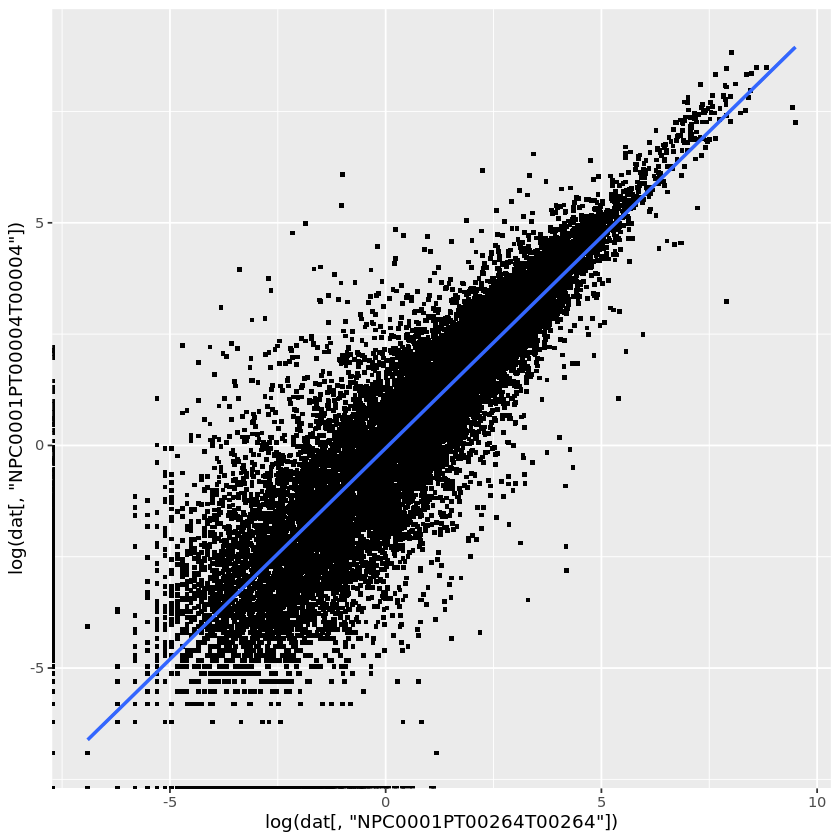

In [55]:
#install.packages("ggplot2")
#install.packages("dplyr")
library(ggplot2)
library(dplyr)

a=dat[,"NPC0001PT00264T00264"]
b=dat[,"NPC0001PT00004T00004"]
cor(a,b,method="pearson")
ggplot(dat,aes(x=log(dat[,"NPC0001PT00264T00264"]),y=log(dat[,"NPC0001PT00004T00004"])))+ geom_point(size=1,shape=15)+geom_smooth(method=lm)

multiple correlation test for the whole matrix.

In [56]:
c=cor(dat,method="pearson")
head(c)

,NPC0001PT00264T00264,NPC0001PT00004T00004,NPC0001PT00078T00078,NPC0001PT00234T00234,NPC0001PT00349T00349,NPC0001PT00289T00289,NPC0001PT00370T00370,NPC0001PT00029T00029,NPC0001PT00236T00236,NPC0001PT00312T00312,...,NPC0001PT00346T00346,NPC0001PT00178T00178,NPC0001PT00027T00027,NPC0001PT00336T00336,NPC0001PT00001T00001,NPC0001PT00357T00357,NPC0001PT00369T00369,NPC0001PT00431T00431,NPC0002PT00039T00039,NPC0001PT00221T00221
NPC0001PT00264T00264,1.0000000,0.7619743,0.9064137,0.8927557,0.8221331,0.9420155,0.9354210,0.9016936,0.7302610,0.6812367,...,0.6449329,0.7700736,0.6852180,0.9362955,0.9351423,0.7871008,0.9492589,0.6438744,0.9572252,0.7881105
NPC0001PT00004T00004,0.7619743,1.0000000,0.5418956,0.7870795,0.8378412,0.7506742,0.7755897,0.8748695,0.8788860,0.9064822,...,0.7644970,0.8682911,0.8789374,0.8543217,0.7387482,0.6695963,0.6820543,0.7250077,0.6516672,0.8363509
NPC0001PT00078T00078,0.9064137,0.5418956,1.0000000,0.8095151,0.7286929,0.8973359,0.8868079,0.7675725,0.5156976,0.4575941,...,0.5100956,0.5896796,0.4524315,0.8134303,0.9132434,0.7382564,0.9607894,0.4835569,0.9511937,0.6757162
NPC0001PT00234T00234,0.8927557,0.7870795,0.8095151,1.0000000,0.9011559,0.9478682,0.9491530,0.8587255,0.8674132,0.7352297,...,0.8239579,0.8915971,0.7902617,0.9128978,0.9414226,0.9242827,0.8267468,0.8535795,0.9076174,0.9030670
NPC0001PT00349T00349,0.8221331,0.8378412,0.7286929,0.9011559,1.0000000,0.8552121,0.8891734,0.8427830,0.8721639,0.8247737,...,0.8790366,0.9087412,0.8173396,0.8623803,0.8921558,0.8623212,0.7878885,0.7825786,0.8078358,0.9465429
NPC0001PT00289T00289,0.9420155,0.7506742,0.8973359,0.9478682,0.8552121,1.0000000,0.9641800,0.8682518,0.7734538,0.6784062,...,0.7058081,0.8049435,0.7252636,0.9197885,0.9584010,0.8755859,0.9058120,0.7559941,0.9445880,0.8308600


### PCA analysis

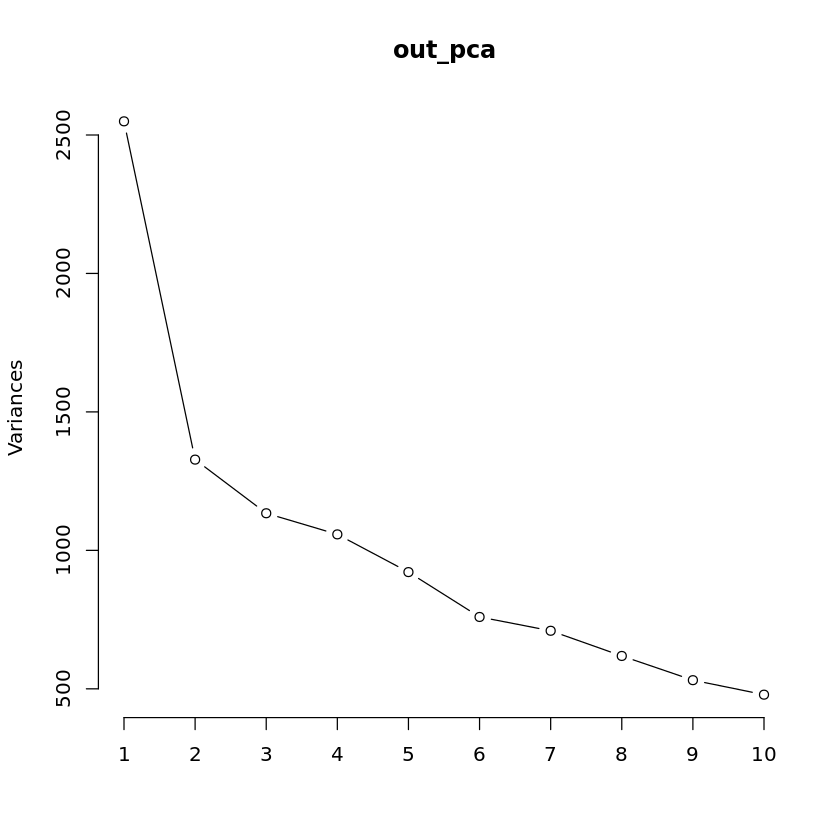

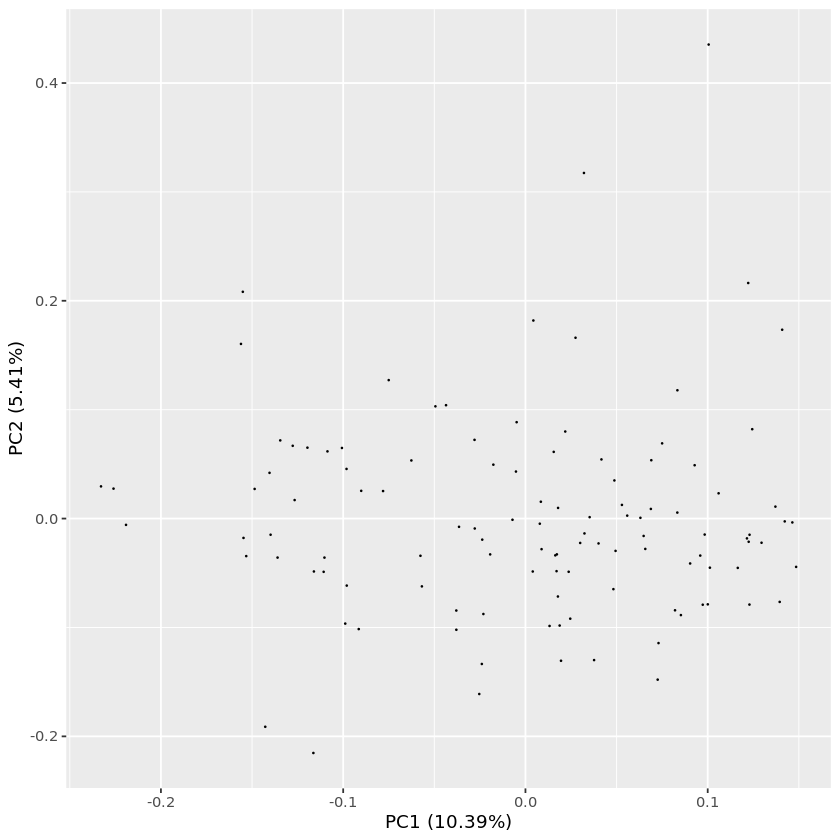

In [57]:
#install.packages('ggfortify')
library(ggfortify)
dat_pca=t(dat)
#head(dat_pca[,1:100])

##apply PCA - scale. = TRUE is highly advisable, but default is FALSE. 
out_pca <- prcomp(dat_pca,scale= TRUE)
plot(out_pca,type="l")
autoplot(out_pca,data=dat_pca,size=0.1,label=FALSE,label.size=5)

### read in samples information

In [59]:
info <- as.data.frame(read.table("GSE102349_series_matrix_survival.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info) <- info[,1]
info<-info[,-1]
dim(info)

#remove missing data and filter out clinical stage I and II samples
info=info[!info[, "time"] == "N/A",]
info=info[info[, "clinical_stage"] == "III" | info[, "clinical_stage"] == "IV",]

dim(info)
head(info)
table(info$`clinical_stage`)

[1] 113   3

[1] 61  3

,time,event,clinical_stage
,<chr>,<chr>,<chr>
NPC0001PT00004T00004,21.1,Last follow-up,IV
NPC0001PT00078T00078,21.39,Disease progression,III
NPC0001PT00370T00370,26.9,Last follow-up,IV
NPC0001PT00312T00312,6.01,Disease progression,III
NPC0001PT00061T00061,40.06666667,Last follow-up,IV
NPC0001PT00196T00196,34.5,Last follow-up,III



III  IV 
 39  22 

## survival analysis

,time,event,clinical_stage
,<dbl>,<dbl>,<chr>
NPC0001PT00004T00004,21.10000,0,IV
NPC0001PT00078T00078,21.39000,1,III
NPC0001PT00370T00370,26.90000,0,IV
NPC0001PT00312T00312,6.01000,1,III
NPC0001PT00061T00061,40.06667,0,IV
NPC0001PT00196T00196,34.50000,0,III


Call:
coxph(formula = Surv(time, event) ~ clinical_stage, data = info)

                   coef exp(coef) se(coef)     z     p
clinical_stageIV 0.5876    1.7996   0.5370 1.094 0.274

Likelihood ratio test=1.18  on 1 df, p=0.2771
n= 61, number of events= 14 

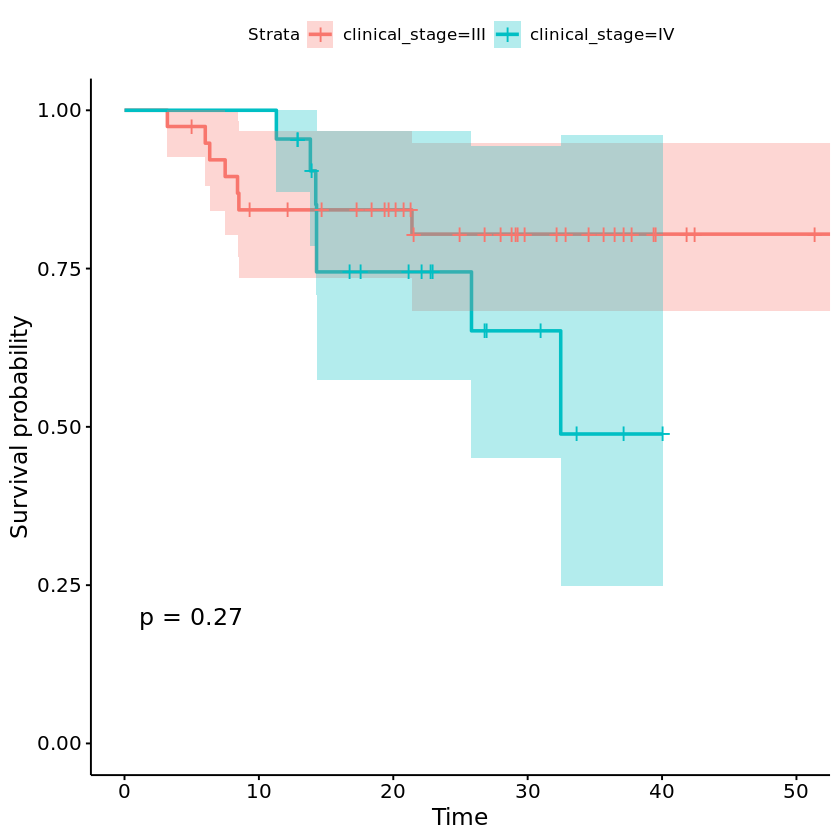

In [60]:
#install.packages("survminer")
#install.packages("survival")

library(survival)
library(ggplot2)
library(survminer)
library(dplyr)

#set time value to numeric 
info$time=as.numeric(as.character(info$time))

#set status value to numeric
a <- sub("Disease progression",1,info$event)
info$event <- as.numeric(as.character(sub("Last follow-up",0,a)))
head(info)

coxph(Surv(time, event)~clinical_stage, data=info)
fit <- survfit(Surv(time, event)~clinical_stage, data=info)
ggsurvplot(fit, conf.int=TRUE, pval=TRUE)

## Perform differential gene expression analysis using edgeR
For gene length bias correction, is often included in the "normalization" term.  
This expression value has normalization


In [61]:
head(dat)
head(info)
#head(dge)

,NPC0001PT00264T00264,NPC0001PT00004T00004,NPC0001PT00078T00078,NPC0001PT00234T00234,NPC0001PT00349T00349,NPC0001PT00289T00289,NPC0001PT00370T00370,NPC0001PT00029T00029,NPC0001PT00236T00236,NPC0001PT00312T00312,...,NPC0001PT00346T00346,NPC0001PT00178T00178,NPC0001PT00027T00027,NPC0001PT00336T00336,NPC0001PT00001T00001,NPC0001PT00357T00357,NPC0001PT00369T00369,NPC0001PT00431T00431,NPC0002PT00039T00039,NPC0001PT00221T00221
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AF085995,1.006,0.266,0.293,0.628,0.277,1.048,0.311,0.432,0.245,0.582,...,0.840,0.429,0.442,0.447,0.891,0.375,0.626,0.613,0.306,0.095
MTVR2,0.152,0.037,0.047,0.022,0.019,0.000,0.022,0.000,0.177,0.000,...,0.045,0.020,0.050,0.021,0.000,0.042,0.000,0.026,0.000,0.027
ATRX,8.318,9.318,6.199,5.876,6.973,6.542,7.234,6.525,9.736,9.220,...,10.688,6.954,6.091,6.361,6.529,4.937,7.778,6.855,11.404,8.645
AK057978,0.107,0.041,0.019,0.042,0.059,0.042,0.066,0.033,0.302,0.073,...,0.055,0.038,0.020,0.040,0.069,0.046,0.028,0.029,0.074,0.036
LOC441204,0.053,0.061,0.172,0.109,0.101,0.618,0.205,0.210,0.051,0.452,...,0.122,0.025,0.230,0.050,0.223,0.139,0.249,0.294,0.203,0.020
TCOF1,12.437,20.296,16.882,8.065,13.310,13.927,14.682,19.676,21.845,23.440,...,16.034,12.784,21.449,15.381,9.814,12.388,18.795,9.762,12.463,16.465


,time,event,clinical_stage
,<dbl>,<dbl>,<chr>
NPC0001PT00004T00004,21.10000,0,IV
NPC0001PT00078T00078,21.39000,1,III
NPC0001PT00370T00370,26.90000,0,IV
NPC0001PT00312T00312,6.01000,1,III
NPC0001PT00061T00061,40.06667,0,IV
NPC0001PT00196T00196,34.50000,0,III


### volcano plot

Disp = 0.18848 , BCV = 0.4341 


,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
CCKAR,4.270684,3.464439,4.054208e-09,5.644400e-05
ELSPBP1,6.223071,3.501079,4.602038e-09,5.644400e-05
SOST,3.184104,2.749740,8.987776e-09,7.349005e-05
FABP4,3.082498,3.225215,1.320799e-08,8.099797e-05
HSD17B13,4.024169,2.710152,2.575775e-08,1.263675e-04
DLX5,2.227876,4.360906,1.676045e-07,6.656330e-04


[1] 15000     4

[1] "logFC"  "logCPM" "PValue" "FDR"


 DOWN   NOT    UP 
  100 14622   278 

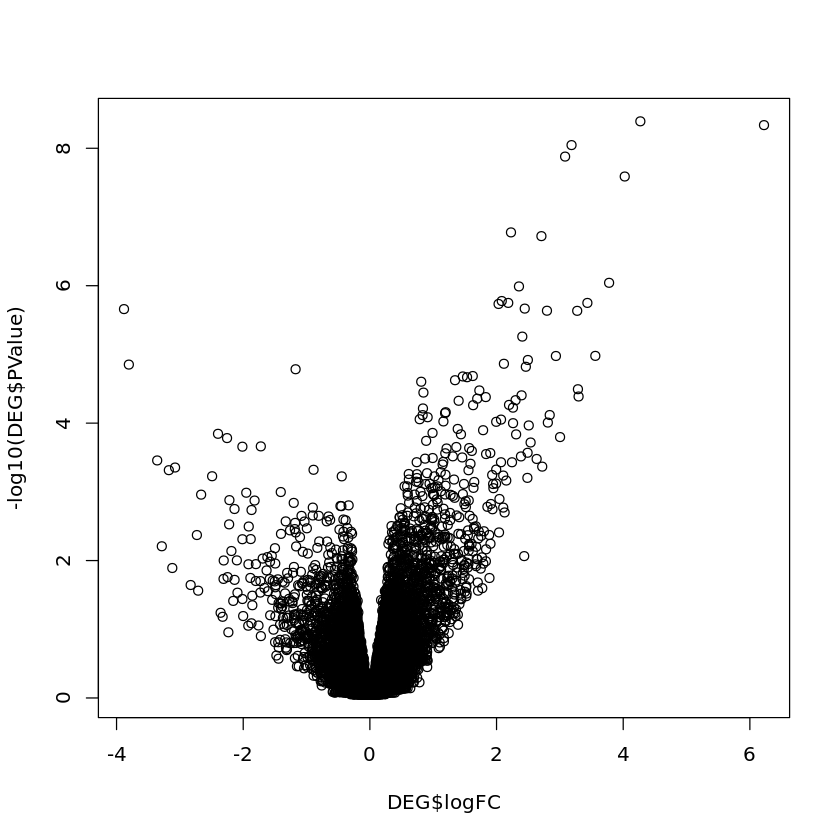

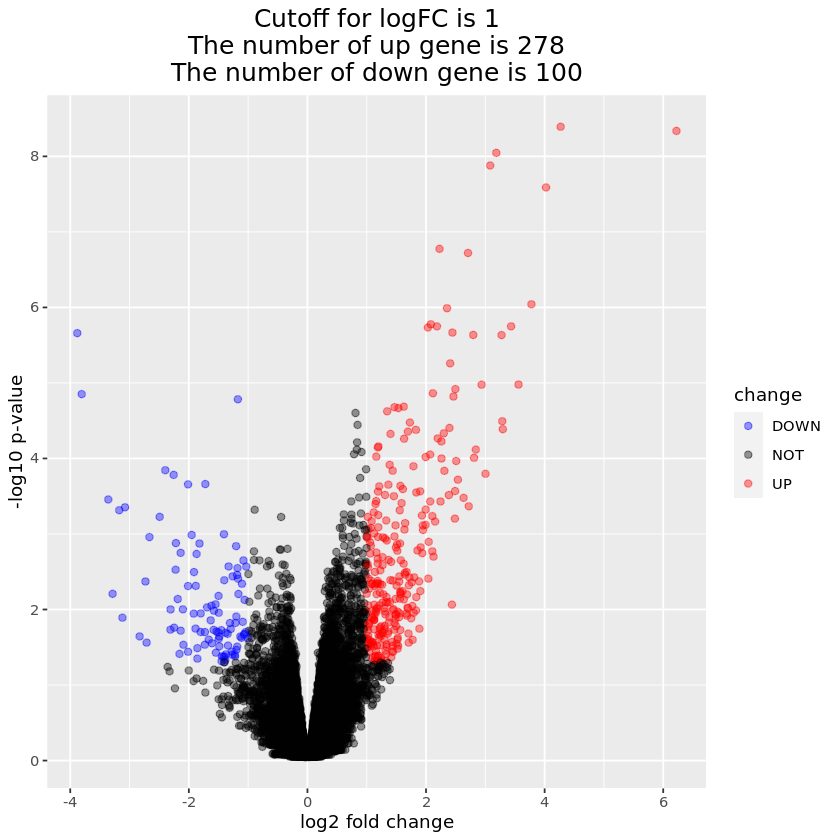

In [62]:
#install package
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

#BiocManager::install("edgeR")

library(edgeR)
library(stats)
library(ggplot2)

group_list=info$clinical_stage
dge <- DGEList(counts=dat[,rownames(info)],group=group_list)
dge <- calcNormFactors(dge)

#normalization and Estimated dispersion，gene with large dispersion can be selected as differential expressed genes.
dge <- calcNormFactors(dge)
dge <- estimateCommonDisp(dge, verbose=TRUE)
dge <-estimateTagwiseDisp(dge)

#selecte differential expression genes
selected <- exactTest(dge,pair = c("III","IV")) #group stage III vs stage IV
top <- topTags(selected,n=15000)  #get top diff 15000 genes

#extract differential expressed genes
diff=top$table
diff=diff[is.na(diff$FDR)==FALSE,]
head(diff)
dim(diff)

#draw picture
library(ggplot2)
DEG=diff
colnames(DEG)
plot(DEG$logFC,-log10(DEG$PValue))
#logFC_cutoff <- with(DEG,mean(abs(logFC)) + 2*sd(abs( logFC)) )
logFC_cutoff=1  #set cut off
DEG$change = as.factor(ifelse(DEG$PValue < 0.05 & abs(DEG$logFC) > logFC_cutoff,
                              ifelse(DEG$logFC > logFC_cutoff ,'UP','DOWN'),'NOT')
)
table(DEG$change)
this_tile <- paste0('Cutoff for logFC is ',round(logFC_cutoff,3),
                    '\nThe number of up gene is ',nrow(DEG[DEG$change =='UP',]) ,
                    '\nThe number of down gene is ',nrow(DEG[DEG$change =='DOWN',])
)
g = ggplot(data=DEG, aes(,x=logFC, y=-log10(PValue),color=change)) + geom_point(alpha=0.4, size=1.75) +
  theme_set(theme_set(theme_bw(base_size=20)))+ xlab("log2 fold change") + ylab("-log10 p-value") + 
  ggtitle(this_tile) +  theme(plot.title = element_text(size=15,hjust = 0.5)) + 
  scale_colour_manual(values = c('blue','black','red')) ## corresponding to the levels(res$change)
print(g)
#ggsave(g,filename = 'volcano.pvalue.png')

### Heatmap

Disp = 0.18848 , BCV = 0.4341 


,logFC,logCPM,PValue
,<dbl>,<dbl>,<dbl>
AF085995,-0.16116757,2.264574,0.81268993
MTVR2,-0.07076172,1.945812,1.00000000
ATRX,0.28600843,4.201336,0.04485085
AK057978,-0.02303271,1.978610,1.00000000
LOC441204,0.59359577,2.047847,0.54474933
TCOF1,0.17856403,5.112265,0.25346749


,logFC,logCPM,PValue
,<dbl>,<dbl>,<dbl>
ELSPBP1,6.223071,3.501079,4.602038e-09
CCKAR,4.270684,3.464439,4.054208e-09
HSD17B13,4.024169,2.710152,2.575775e-08
SFRP5,3.777189,2.966186,9.076297e-07
CCKBR,3.559706,2.277660,1.050334e-05
TRPM8,3.434411,2.296008,1.780585e-06


[1] 100   3

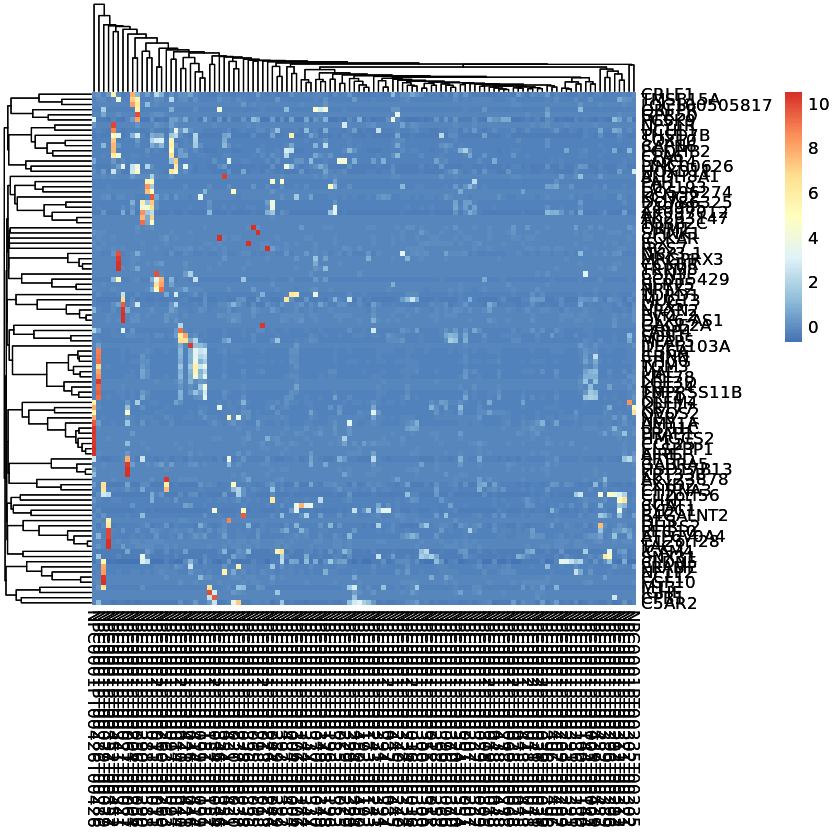

In [63]:
#install.packages("pheatmap")
library(edgeR)
library(stats)
library(ggplot2)
library(pheatmap)

group_list=info$clinical_stage
dge <- DGEList(counts=dat[,rownames(info)],group=group_list)
dge <- calcNormFactors(dge)

#normalization and Estimated dispersion，gene with large dispersion can be selected as differential expressed genes.
dge <- calcNormFactors(dge)
dge <- estimateCommonDisp(dge, verbose=TRUE)
dge <-estimateTagwiseDisp(dge)

#selecte differential expression genes
selected <- exactTest(dge,pair = c("III","IV")) #group stage III vs stage IV
head(selected$table)

#extract differential expressed genes
diff=selected$table
up=diff[order(diff[,"logFC"],decreasing=TRUE),][1:50,] 
low=diff[order(diff[,"logFC"],decreasing=FALSE),][1:50,]
diff=rbind(up,low)
head(diff)
dim(diff)

aa=t(dat[row.names(diff),])
aa=t(scale(aa))

#deal with outlier to embellish the figure （if necessary)
#aa[aa>=4]=4

p<-pheatmap(aa,show_rownames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE)
p
#colnames(aa[,p$tree_col[["order"]]]) 
#rownames(aa[p$tree_row[["order"]],]) 